In [1]:
import sys
sys.path.append("..")

import pandas as pd
import random
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

from utils.evaluation import model_evaluation, baseline_models_evaluation
from scipy import stats

plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
    })
random.seed(1)

In [2]:
full_model_predictions = pd.read_csv("../predictions/full_model_predictions_test.csv")
minus_layoutlm_predictions = pd.read_csv("../predictions/minus_layoutlm_predictions_test.csv")
minus_resnet_predictions = pd.read_csv("../predictions/minus_resnet_predictions_test.csv")
full_model_predictions_tobacco800 = pd.read_csv("../predictions/full_model_predictions_tobacco800.csv")

# Model performance compared to baselines

In [3]:
model_performance = model_evaluation(full_model_predictions)

100%|██████████| 5000/5000 [09:35<00:00,  8.69it/s]


In [4]:
model_performance.to_csv("full_model_performance.csv")
model_performance.describe()

,model_F1,model_precision,model_recall,model_MNDD
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.952908,0.947022,0.963633,3.439800
std,0.052974,0.073362,0.062202,7.015997
min,0.000000,0.000000,0.000000,0.000000
25%,0.923077,0.909091,0.923077,0.000000
50%,0.960000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,87.000000


In [5]:
baseline_performance = baseline_models_evaluation(full_model_predictions)

100%|██████████| 5000/5000 [00:30<00:00, 163.09it/s]


In [6]:
baseline_performance.to_csv("baseline_model_performance.csv")
baseline_performance.describe()

,onlyfirst_F1,onlyfirst_precision,onlyfirst_recall,random_F1,random_precision,random_recall
count,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.00000
mean,0.182263,1.0,0.101666,0.432472,0.415233,0.49839
std,0.061772,0.0,0.041565,0.147512,0.193944,0.16049
min,0.074074,1.0,0.038462,0.000000,0.000000,0.00000
25%,0.142857,1.0,0.076923,0.333333,0.272727,0.40000
50%,0.166667,1.0,0.090909,0.421053,0.379310,0.50000
75%,0.200000,1.0,0.111111,0.529412,0.500000,0.60000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.00000


# Model performance on the Tobacco800 dataset

In [7]:
# accuracy
import sklearn
acc = sklearn.metrics.accuracy_score(full_model_predictions_tobacco800['label'], full_model_predictions_tobacco800['prediction']) 
one_page = full_model_predictions_tobacco800['stem'].apply(lambda i: len(i.split('-'))==1)
not_one_page = full_model_predictions_tobacco800['stem'].apply(lambda i: len(i.split('-'))!=1)

acc_one_page = sklearn.metrics.accuracy_score(full_model_predictions_tobacco800[one_page]['label'], full_model_predictions_tobacco800[one_page]['prediction']) 
acc_not_one_page = sklearn.metrics.accuracy_score(full_model_predictions_tobacco800[not_one_page]['label'], full_model_predictions_tobacco800[not_one_page]['prediction']) 


print(f"Accuracy ALL: {acc} (N={len(full_model_predictions_tobacco800)})")
print(f"Accuracy one page: {acc_one_page} (N={len(full_model_predictions_tobacco800[one_page])})")
print(f"Accuracy multipage: {acc_not_one_page} (N={len(full_model_predictions_tobacco800[not_one_page])})")

Accuracy ALL: 0.9769230769230769 (N=260)
Accuracy one page: 0.9809523809523809 (N=105)
Accuracy multipage: 0.9741935483870968 (N=155)


# Ablation studies

In [8]:
minus_resnet_performance = model_evaluation(minus_resnet_predictions)
minus_resnet_performance.to_csv("minus_resnet_performance.csv")

100%|██████████| 5000/5000 [04:05<00:00, 20.39it/s]


In [9]:
minus_layoutlm_performance = model_evaluation(minus_layoutlm_predictions)
minus_layoutlm_performance.to_csv("minus_layoutlm_performance.csv")

100%|██████████| 5000/5000 [10:15<00:00,  8.13it/s]


In [10]:
minus_resnet_performance.describe()

,model_F1,model_precision,model_recall,model_MNDD
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.558500,0.940323,0.421237,15.927800
std,0.203727,0.181339,0.197098,10.676825
min,0.000000,0.000000,0.000000,0.000000
25%,0.434783,1.000000,0.285714,8.000000
50%,0.588235,1.000000,0.416667,14.000000
75%,0.705882,1.000000,0.555556,22.000000
max,1.000000,1.000000,1.000000,96.000000


In [11]:
minus_layoutlm_performance.describe()

,model_F1,model_precision,model_recall,model_MNDD
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.942486,0.943509,0.947764,3.910000
std,0.060255,0.078845,0.075175,7.257798
min,0.000000,0.000000,0.000000,0.000000
25%,0.909091,0.900000,0.909091,0.000000
50%,0.952381,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,87.000000


# Statistical analysis: boxplots

In [12]:
model_performance = pd.read_csv("full_model_performance.csv")
minus_layoutlm_performance = pd.read_csv("minus_layoutlm_performance.csv")
minus_resnet_performance = pd.read_csv("minus_resnet_performance.csv")

In [13]:
model_performance.loc[5]

folder_id                                                          6
label              [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
model_pred         [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
model_F1                                                    0.947368
model_precision                                                  1.0
model_recall                                                     0.9
model_MNDD                                                       3.0
Name: 5, dtype: object

In [14]:
pd.read_csv("full_model_performance.csv",index_col = "folder_id").loc[5]

label                        [1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0]
model_pred         [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, ...
model_F1                                                         1.0
model_precision                                                  1.0
model_recall                                                     1.0
model_MNDD                                                       0.0
Name: 5, dtype: object

In [15]:
minus_resnet_performance.describe()

,folder_id,model_F1,model_precision,model_recall,model_MNDD
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.558500,0.940323,0.421237,15.927800
std,1443.520003,0.203727,0.181339,0.197098,10.676825
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,0.434783,1.000000,0.285714,8.000000
50%,2500.500000,0.588235,1.000000,0.416667,14.000000
75%,3750.250000,0.705882,1.000000,0.555556,22.000000
max,5000.000000,1.000000,1.000000,1.000000,96.000000


In [16]:
model_performance.describe()

,folder_id,model_F1,model_precision,model_recall,model_MNDD
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,0.952908,0.947022,0.963633,3.439800
std,1443.520003,0.052974,0.073362,0.062202,7.015997
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,0.923077,0.909091,0.923077,0.000000
50%,2500.500000,0.960000,1.000000,1.000000,1.000000
75%,3750.250000,1.000000,1.000000,1.000000,3.000000
max,5000.000000,1.000000,1.000000,1.000000,87.000000


In [17]:
f1 = pd.DataFrame({"Original model": model_performance.model_F1, "... minus LayoutLM": minus_layoutlm_performance.model_F1, "... minus Resnet": minus_resnet_performance.model_F1})
f1

,Original model,... minus LayoutLM,... minus Resnet
0,0.923077,0.960000,0.400000
1,1.000000,1.000000,0.750000
2,1.000000,1.000000,0.428571
3,0.941176,0.941176,0.615385
4,1.000000,1.000000,0.857143
...,...,...,...
4995,0.933333,0.933333,0.235294
4996,1.000000,0.880000,0.533333
4997,0.800000,0.833333,0.666667
4998,1.000000,1.000000,0.750000


In [18]:
mndd = pd.DataFrame({"Original model": model_performance.model_MNDD, "... minus LayoutLM": minus_layoutlm_performance.model_MNDD, "... minus Resnet": minus_resnet_performance.model_MNDD})
mndd

,Original model,... minus LayoutLM,... minus Resnet
0,2.0,2.0,10.0
1,0.0,0.0,5.0
2,0.0,0.0,9.0
3,1.0,1.0,6.0
4,0.0,0.0,5.0
...,...,...,...
4995,2.0,4.0,24.0
4996,0.0,4.0,12.0
4997,5.0,5.0,16.0
4998,0.0,0.0,2.0


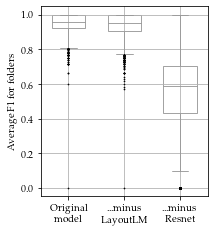

In [19]:
fig, ax = plt.subplots(1,1, figsize=(3,3.5))
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
flierprops = dict(marker='o', linestyle='none', markeredgecolor='black', markersize = .7)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(f1),color = "white", flierprops=flierprops, width = .6, linewidth = .9)
ax.set(xlabel = None, ylabel = "Average F1 for folders")
ax.set_xticklabels(["Original\nmodel", "...minus\nLayoutLM", "...minus\nResnet"])
ax.grid(True)
plt.savefig("figs/F1_boxplot.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
plt.savefig("figs/F1_boxplot.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()

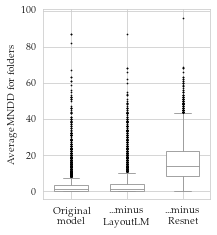

In [20]:
fig, ax = plt.subplots(1,1, figsize=(3,3.5))
sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
flierprops = dict(marker='o', linestyle='none', markeredgecolor='black', markersize = .7)
ax = sns.boxplot(x="variable", y="value", data=pd.melt(mndd),color = "white", flierprops=flierprops, width = .6, linewidth = .9)
ax.set(xlabel = None, ylabel = "Average MNDD for folders")
ax.set_xticklabels(["Original\nmodel", "...minus\nLayoutLM", "...minus\nResnet"])
ax.grid(True)
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
plt.savefig("figs/MNDD_boxplot.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
plt.show()

# Statistical analysis: paired t-test for ablation studies

In [21]:
stats.ttest_rel(model_performance['model_F1'], minus_resnet_performance['model_F1'])

Ttest_relResult(statistic=136.86370120670432, pvalue=0.0)

In [22]:
stats.ttest_rel(model_performance['model_F1'], minus_layoutlm_performance['model_F1'])

Ttest_relResult(statistic=13.369034397987033, pvalue=4.444209963470507e-40)

In [23]:
stats.ttest_rel(model_performance['model_MNDD'], minus_resnet_performance['model_MNDD'])

Ttest_relResult(statistic=-84.21098121698773, pvalue=0.0)

In [24]:
stats.ttest_rel(model_performance['model_MNDD'], minus_layoutlm_performance['model_MNDD'])

Ttest_relResult(statistic=-4.439535872194734, pvalue=9.209470961296132e-06)